<style>
.output_png!important {
    display: table-cell;
    text-align: right;
    vertical-align: middle;
}
</style>

<script>
    var code_show=true; //true -> hide code at first

    function code_toggle() {
        $('div.prompt').hide(); // always hide prompt
        $('div[style*="border-style: dashed"]').hide(); // hide extra comments, usually log from treasuredata
        $('div.output_stderr').parent().hide();

        if (code_show){
            $('div.input').hide();
        } else {
            $('div.input').show();
        }
        code_show = !code_show
    }
    $( document ).ready(code_toggle);
</script>

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12, 7)
sns.set_context('poster')

# Scatterplot

We will be using iris dataset to play around scatterplot

In [11]:
iris = sns.load_dataset('iris')

In [12]:
unique_species = iris.species.unique()
unique_species.sort()
species_to_id = {species: idx for idx, species in enumerate(unique_species)}

In [13]:
iris['species_id'] = iris.species.apply(lambda s: species_to_id.get(s))

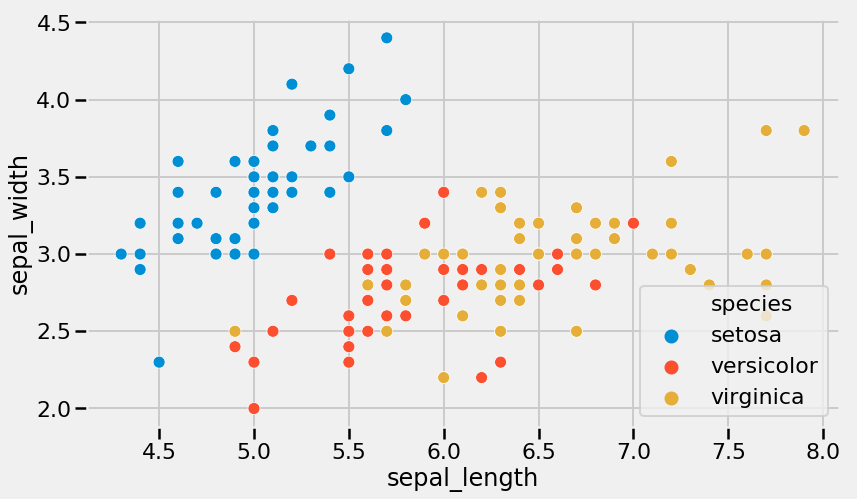

In [14]:
sns.scatterplot(
    iris.sepal_length,
    iris.sepal_width,
    hue=iris.species
)
plt.show()

## Your Goal

We are interested with "Setosa" species, now we should make our users understand with 1 time look into our graph. Since our graph contains so many information and distraction, while we wanted to put attention to "sentosa" only, then we need to remove clutters in our graph.


## Removing Clutters
Step by Steps:
### 1. Simplify Category
```
iris['is_setosa'] = iris.species.apply(lambda x: x if x == 'setosa' else 'not setosa')
```
### 2. Remove Gridlines
```
plt.grid(None)
```
### 3. Change Axis color to gray
```
plt.xlabel('Sepal Length', color='gray')
plt.ylabel('Petal Length', color='gray')
plt.tick_params(axis='x', colors='gray')
plt.tick_params(axis='y', colors='gray')
```
### 4. Use Supertitle and Title Wisely
```
plt.suptitle('Setosa has Narrower Petal Than Others')
plt.title('Relation Between Petal Length And Sepal Length', color='grey', fontsize=14)
```

### 5. Move Legend outside of graph
```
plt.legend(loc='lower center', bbox_to_anchor=[.5,-.3], ncol=4, fontsize=15)
```

In [110]:
iris['is_setosa'] = iris.species.apply(lambda x: x if x == 'setosa' else 'not setosa')

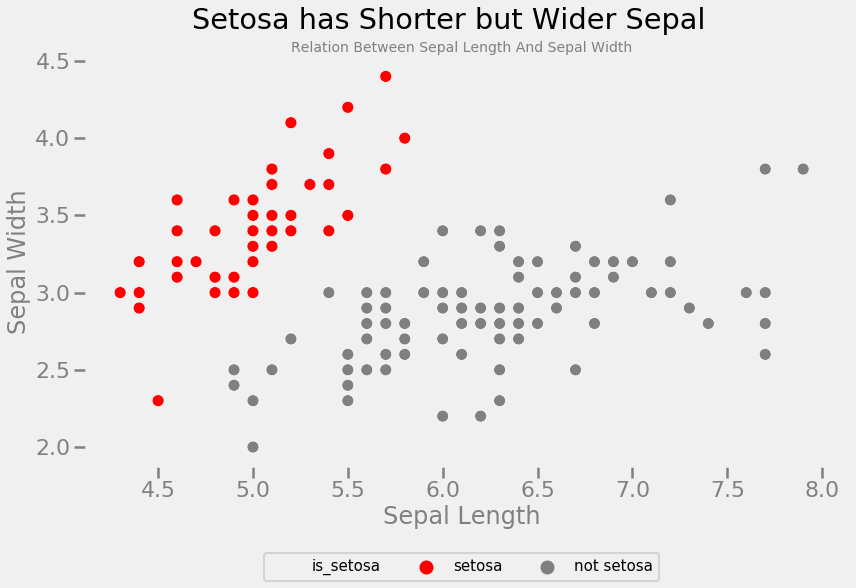

In [124]:
sns.set_palette(["red", "gray"])
sns.scatterplot(
    iris.sepal_length,
    iris.sepal_width,
    hue=iris.is_setosa
)

plt.grid(None)
plt.suptitle('Setosa has Shorter but Wider Sepal')
plt.title('Relation Between Sepal Length And Sepal Width', color='grey', fontsize=14)
plt.legend(loc='lower center', bbox_to_anchor=[.5,-.3], ncol=4, fontsize=15)
plt.xlabel('Sepal Length', color='gray')
plt.ylabel('Sepal Width', color='gray')
plt.tick_params(axis='x', colors='gray')
plt.tick_params(axis='y', colors='gray')
plt.show()

## Your Turn!

We still interested in "setosa" and try to show that setosa has the smallest petal over all Irises. Remove the clutters and try to tell the story without even using words in markdown!

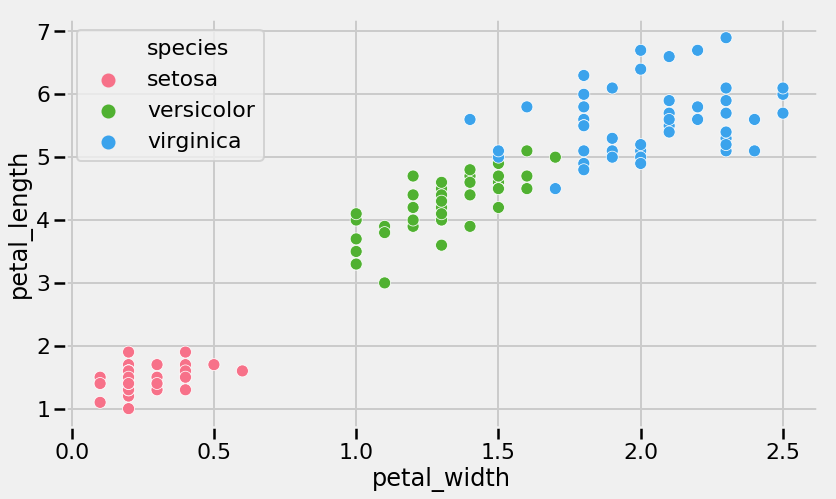

In [126]:
sns.scatterplot(
    iris.petal_width,
    iris.petal_length,
    hue=iris.species
)
plt.show()

# Lineplot

We will be using shampoo sales dataset$^{3}$ 

In [112]:
shampoo = pd.read_csv(
    'https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv'
    , delimiter=';'
)

In [113]:
shampoo.head()

,Month,Sales
0,01-01,266.0
1,01-02,145.9
2,01-03,183.1
3,01-04,119.3
4,01-05,180.3


The month is in format "yy-mm" lets first append "20" to the month and make it pandas datetime

In [114]:
## your code here

In [115]:
# answer
shampoo['dt'] = pd.to_datetime(shampoo['Month'].apply(lambda x: "20"+x), format='%Y-%m')

now draw your timeseries trend 

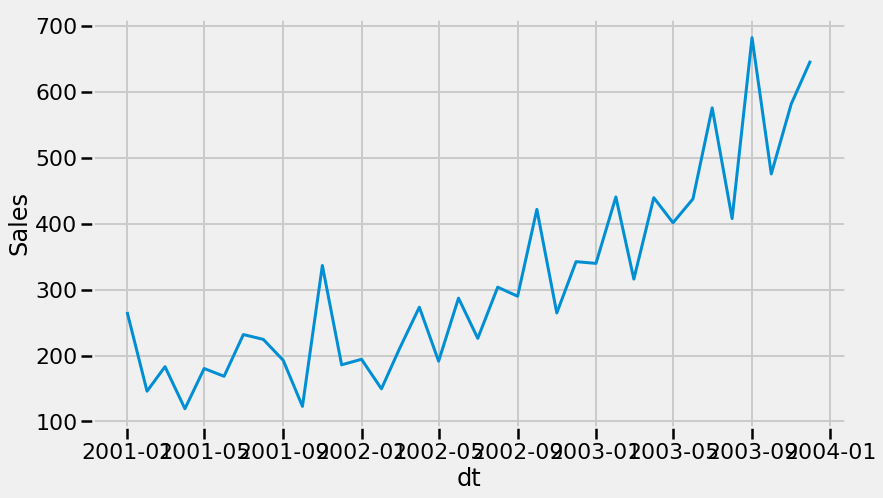

In [116]:
sns.lineplot(
    x='dt',
    y='Sales',
    data=shampoo
)
plt.show()

## Your Goal
What can you see from this graph?
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>
<br/>

you might guess it right! You can see:

1. There's certain months that the sales peaked
2. There's increasing trends
3. You could make a forecast! (Bonus)

## Removing The Clutter Again!

Tasks, similar to previously mentioned:
### 1. Remove Gridlines
### 2. Change Axis color to gray, and labels to be more simple
```
import matplotlib.dates as mdates
....
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))
```
### 3. Use Supertitle and Title Wisely
### 4. Calculate Moving Average as "Trend"
```
df.set_index()
df[column].rolling(rolling_period).mean()
```
### 5. Highlight Forecast
```
plt.axvspan(
    min,
    max,
    alpha=...,
    color=...
)
```
### 6. Highlight Peaks / Other Interesting Trends
```
plt.annotate(
    text,
    xypoint,
    xytext,
    ha='center',
    va='center',
    ...
)
```


In [117]:
import matplotlib.dates as mdates

In [131]:
shampoo = shampoo.set_index('dt', drop=False)
shampoo['MA_Sales'] = shampoo['Sales'].rolling(6).mean()
shampoo['Sales_no_trend'] = shampoo['Sales'] - shampoo['MA_Sales']

In [166]:
from sklearn.linear_model import LinearRegression

In [227]:
ma_sales = shampoo['MA_Sales'].values
x = np.arange(shampoo.shape[0])
# filter nan
x = x[
    ~pd.isnull(ma_sales)
]

ma_sales = ma_sales[
    ~pd.isnull(ma_sales)
]


forecaster = LinearRegression()
forecaster.fit(x.reshape(-1, 1), np.log(ma_sales))

max_x = np.max(x)
forecast_x = np.array([max_x + i for i in range(1, 7)])
forecast = forecaster.predict(forecast_x.reshape(-1, 1))

min_dt = shampoo['dt'].min()
additional_dates = np.array([ min_dt + pd.DateOffset(months=fx) for fx in forecast_x])
shampoo_forecast = pd.DataFrame({'dt': additional_dates, 'Sales_forecast': np.exp(forecast)})
shampoo_forecast = shampoo_forecast.set_index('dt', drop=False)

shampoo_wt_forecast = pd.concat([shampoo, shampoo_forecast])


/home/arie/miniconda2/envs/data_analysis_351/lib/python3.5/site-packages/ipykernel_launcher.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



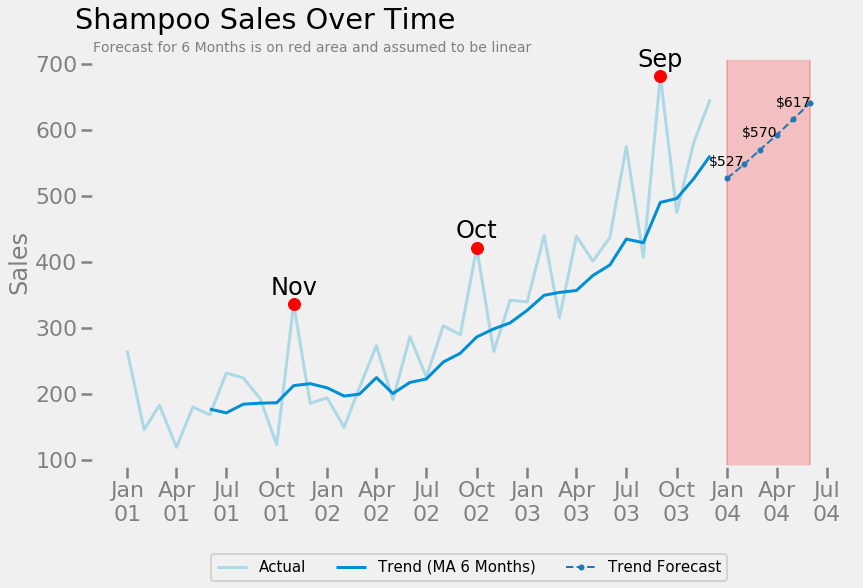

In [290]:
ax = sns.lineplot(
    x='dt',
    y='Sales',
    data=shampoo,
    color='lightblue',
    label='Actual'
)

sns.lineplot(
    x='dt',
    y='MA_Sales',
    data=shampoo,
    label='Trend (MA 6 Months)'
)
df_forecast = shampoo_wt_forecast[
    ~shampoo_wt_forecast['Sales_forecast'].isnull()
]

plt.plot(
    df_forecast.dt,
    df_forecast.Sales_forecast,
    linestyle='--',
    linewidth=2,
    marker='o',
    markersize=5,
    color='#1F78B4',
    label='Trend Forecast'
    
)
plt.axvspan(
    df_forecast.dt.min(),
    df_forecast.dt.max(),
    alpha=0.2,
    color='red'
)
for (i, (ix, row)) in enumerate(df_forecast.iterrows()):
    
    if i%2 == 0:
        plt.annotate(
            '${:.0f}'.format(row.Sales_forecast),
            (row['dt'], row.Sales_forecast),
            (row['dt'], row.Sales_forecast + 25),
            ha='center',
            va='center',
            size=14
        )


## annotating peak sales
idx_max = shampoo.groupby(pd.Grouper(freq='Y')).idxmax()['Sales']
for dt_max in idx_max:
    row = shampoo.loc[dt_max]
    plt.plot(row['dt'], row.Sales, marker='o', color='red')
    plt.annotate(
        '{}'.format(row['dt'].strftime('%b')),
        (row['dt'], row.Sales),
        (row['dt'], row.Sales + 25), 
        ha='center',
        va='center'
    )
    
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%y'))

plt.suptitle('Shampoo Sales Over Time', ha='right')
plt.title('Forecast for 6 Months is on red area and assumed to be linear', color='grey', fontsize=14, loc='left')
plt.grid(None)
plt.xlabel('', color='gray')
plt.ylabel('Sales', color='gray')
plt.tick_params(axis='x', colors='gray')
plt.tick_params(axis='y', colors='gray')
plt.legend(loc='lower center', bbox_to_anchor=[.5,-.3], ncol=4, fontsize=15)
plt.show()

# More Cases!


## Additional Case: 
What's Wrong With this Visualization?

![wtf-1](https://66.media.tumblr.com/400cc2aa15bba1403ec5bcf0a8cbb4cb/tumblr_pkirodB1961sgh0voo1_1280.jpg)



In [292]:
case1_data = pd.DataFrame({
    'country': ['Hong Kong', 'Lebanon', 'Japan', 'Ireland', 'South Korea'],
    'pct_electric_comes_from_abroad': [99, 98, 93, 86, 81]
})

# References

[1] https://medium.com/@andykashyap/top-5-tricks-to-make-plots-look-better-9f6e687c1e08

[2] https://python-graph-gallery.com/190-custom-matplotlib-title/

[3] https://raw.githubusercontent.com/blue-yonder/pydse/master/pydse/data/sales-of-shampoo-over-a-three-ye.csv

[4] https://stackoverflow.com/questions/35339139/where-is-the-documentation-on-pandas-freq-tags

[5] https://pythonmatplotlibtips.blogspot.com/2018/01/add-second-x-axis-below-first-x-axis-python-matplotlib-pyplot.html